In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [46]:
df = pd.read_csv("TravelInsurancePrediction.csv")
df

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


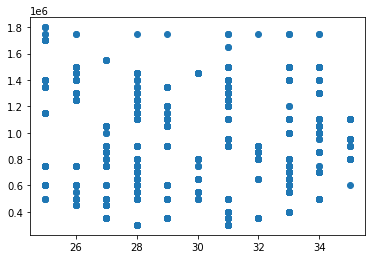

In [10]:
plt.scatter(df.Age,df.AnnualIncome)

In [12]:
#Gætter hvor mange cluster ud fra scatterplot
km = KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [14]:
#
y_predicted = km.fit_predict(df[['Age','AnnualIncome']])
y_predicted

array([1, 0, 1, ..., 0, 0, 1])

In [42]:
#Laver en ny variable "cluster"
df['cluster'] = y_predicted
df.head()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance,cluster
0,31,400000,6,1,0,1
1,31,1250000,7,0,0,0
2,34,500000,4,1,1,1
3,28,700000,3,1,0,1
4,28,700000,8,1,0,1


In [19]:
#indsætter de to cluster ind på 2 dataframe
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

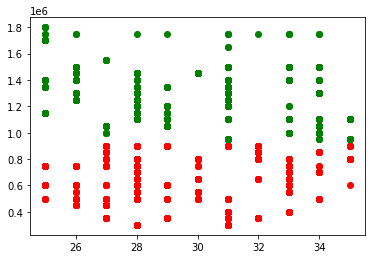

In [43]:
#Plotter
plt.scatter(df1.Age,df1['AnnualIncome'],color='green')
plt.scatter(df2.Age,df2['AnnualIncome'],color='red')

In [26]:
#laver albue metode
k_rng = range(1,5)
sse =[]
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','AnnualIncome']])
    sse.append(km.inertia_)

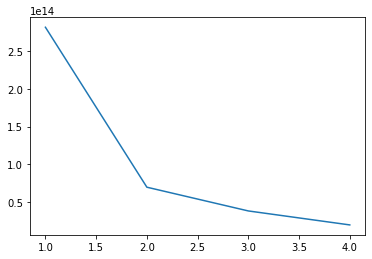

In [28]:
#plotter
plt.plot(k_rng,sse)

In [47]:
df.rename(columns={'Unnamed: 0': 'User'}, inplace=True) 
df = df.drop(columns=['User','Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad'])
df

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
0,31,400000,6,1,0
1,31,1250000,7,0,0
2,34,500000,4,1,1
3,28,700000,3,1,0
4,28,700000,8,1,0
...,...,...,...,...,...
1982,33,1500000,4,0,1
1983,28,1750000,5,1,0
1984,28,1150000,6,1,0
1985,34,1000000,6,0,1


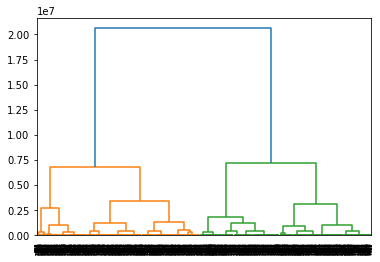

In [48]:
dendogram = sch.dendrogram(sch.linkage(df, method ='ward'))